Hypothesis testing for if right hand exerts more torque than the left hand

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path

### Importing right and left torques

In [8]:
data_fps = 60 # The data was interpolated to 60 fps
participant_id = 1
tool_id = 1
trial_id = 1

participant_id_range = range(1,16)
tool_id_range = range(1,3)
trial_id_range = range(1,4)
#%% Calculate HAL for all trials
left_hand_torques = []
right_hand_torques = []
for participant_id in participant_id_range:
    for tool_id in tool_id_range:
        for trial_id in trial_id_range:
            # Check if the file exists
            if os.path.isfile(r"C:\Users\anand\Desktop\Hand-intensive Manufacturing Processes Dataset\Participant "+str(participant_id)+"\p"+str(participant_id)+" tool"+str(tool_id)+" trial"+str(trial_id)+"\processed torque_detail_l.npy"):
                # print("Participant "+str(participant_id)+"\tTool "+str(tool_id)+"\tTrial "+str(trial_id))
                left_hand_torques.append(np.load(r"C:\Users\anand\Desktop\Hand-intensive Manufacturing Processes Dataset\Participant "+str(participant_id)+"\p"+str(participant_id)+" tool"+str(tool_id)+" trial"+str(trial_id)+"\processed torque_detail_l.npy"))
                right_hand_torques.append(np.load(r"C:\Users\anand\Desktop\Hand-intensive Manufacturing Processes Dataset\Participant "+str(participant_id)+"\p"+str(participant_id)+" tool"+str(tool_id)+" trial"+str(trial_id)+"\processed torque_detail_r.npy"))
            elif os.path.isfile(r"C:\Users\anand\Desktop\Hand-intensive Manufacturing Processes Dataset\Participant "+str(participant_id)+"\\tool"+str(tool_id)+" trial"+str(trial_id)+"\processed p"+str(participant_id)+" tool"+str(tool_id)+" trial"+str(trial_id)+" force_detail_l.npy"):
                # print("Participant "+str(participant_id)+"\tTool "+str(tool_id)+"\tTrial "+str(trial_id))
                left_hand_torques.append(np.load(r"C:\Users\anand\Desktop\Hand-intensive Manufacturing Processes Dataset\Participant "+str(participant_id)+"\\tool"+str(tool_id)+" trial"+str(trial_id)+"\processed p"+str(participant_id)+" tool"+str(tool_id)+" trial"+str(trial_id)+" force_detail_l.npy"))
                right_hand_torques.append(np.load(r"C:\Users\anand\Desktop\Hand-intensive Manufacturing Processes Dataset\Participant "+str(participant_id)+"\\tool"+str(tool_id)+" trial"+str(trial_id)+"\processed p"+str(participant_id)+" tool"+str(tool_id)+" trial"+str(trial_id)+" force_detail_r.npy"))


left_hand_torques = np.concatenate(left_hand_torques)
right_hand_torques = np.concatenate(right_hand_torques)

# Remove nonzero and NaN values
# left_hand_torques = left_hand_torques[~np.isnan(left_hand_torques)]
# right_hand_torques = right_hand_torques[~np.isnan(right_hand_torques)]
# left_hand_torques = left_hand_torques[left_hand_torques>0]
# right_hand_torques = right_hand_torques[right_hand_torques>0]

# Sum over all columns
left_hand_torques = np.sum(left_hand_torques, axis=1)
right_hand_torques = np.sum(right_hand_torques, axis=1)
# 
print("Left hand torques: "+str(left_hand_torques.shape))
print("Right hand torques: "+str(right_hand_torques.shape))

Left hand torques: (1449226,)
Right hand torques: (1449226,)


In [9]:
# In scientific notation


In [13]:
from scipy.stats import mannwhitneyu

u1,p = mannwhitneyu(right_hand_torques, left_hand_torques, alternative='greater')

print("Mann-Whitney U test: "+str(u1))
print("p-value: "+str(p))

Mann-Whitney U test: 1067506409493.0
p-value: 7.767577207225108e-132


In [14]:
# u1 in scientific notation
u1 = "{:.2e}".format(u1)
u1

'1.07e+12'

In [4]:
(u1/(len(left_hand_torques)*len(right_hand_torques)))

0.5082744246237818

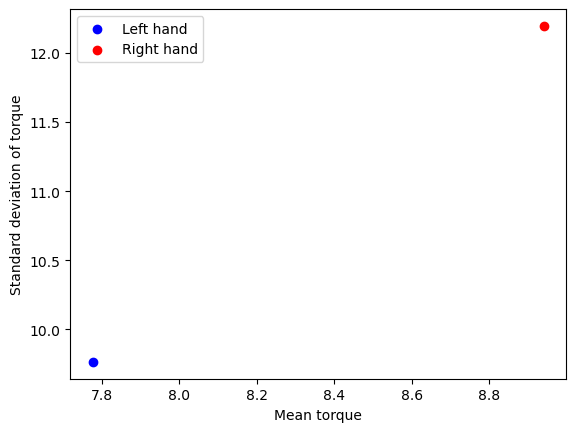

In [5]:
# Plot mean and standard deviation of the torques
plt.figure()
plt.scatter(np.mean(left_hand_torques), np.std(left_hand_torques), color='b', label='Left hand')
plt.scatter(np.mean(right_hand_torques), np.std(right_hand_torques), color='r', label='Right hand')
plt.xlabel('Mean torque')
plt.ylabel('Standard deviation of torque')
plt.legend()

In [6]:
layup_time_wo_shop_aide = [39,32,45,42,62,50,40,44,36,45,41,29,50,62,55]
layup_time_w_shop_aide = [55,33,29,28,19,41,26,31,34,38,28,32,42,47,31]

u2,p = mannwhitneyu(layup_time_wo_shop_aide, layup_time_w_shop_aide, alternative='greater')

print("Mann-Whitney U test: "+str(u2))
print("p-value: "+str(p))

Mann-Whitney U test: 179.5
p-value: 0.0028780170247819023
